<a href="https://colab.research.google.com/github/dinog0d/Lab_Biose_Dinoequipo/blob/main/Parcial_Final_Anny_Raigoza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4. Definir la frecuencia de muestreo para la siguiente señal y obtener las muestras de 10 segundos de la señal usando Colab x(t)= 4 ∗cos(80πt + (π /4))+ k ∗ sin(40πt)+ 5 Con k = 2(a+1) con a = último número de la cédula

Primeras 10 muestras de la señal:
[  7.82842712  22.17157288   7.82842712 -17.82842712   7.82842712
  22.17157288   7.82842712 -17.82842712   7.82842712  22.17157288]


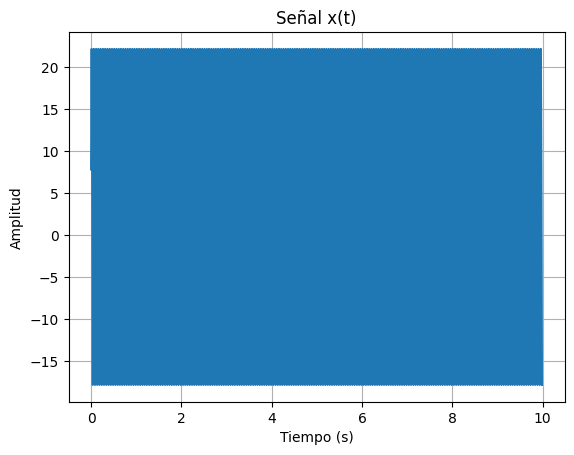

In [6]:
# prompt: Definir la frecuencia de muestreo para la siguiente señal y obtener las muestras de 10
# segundos de la señal usando La señal es . x(t)= 4 ∗cos(80πt + (π /4))+ k ∗ sin(40πt)+ 5 Con k = 20

import numpy as np
import matplotlib.pyplot as plt

# Definir los parámetros de la señal
k = 20 #de K=2(9+1)
frec_mues = 80 # Frecuencia de muestreo elegida teniendo en cuenta el teorema de Nyquist y sabiendo que la máxima frecuencia es de 40 Hz

# Tiempo de simulación (10 segundos)
tiempo_total = 10
tiempo = np.arange(0, tiempo_total, 1/frec_mues)

# Definir la señal
x_t = 4 * np.cos(80 * np.pi * tiempo + (np.pi / 4)) + k * np.sin(40 * np.pi * tiempo) + 5

# Obtener las primeras 10 muestras
muestras_10 = x_t[:10]

# Imprimir las muestras
print("Primeras 10 muestras de la señal:")
print(muestras_10)

# Gráfica (opcional) para visualizar la señal completa
plt.plot(tiempo, x_t)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal x(t)')
plt.grid(True)
plt.show()

5. Programar el periodograma de Welch (NO usar la función de scipy) mediante una función que:

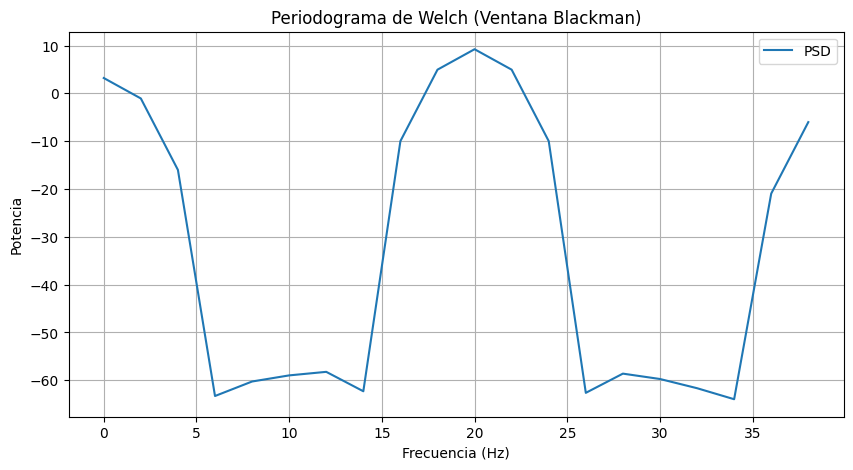

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Generación de la señal (Punto 4)

k = 20  # de K=2(9+1) con a=9
fs = 80  # Frecuencia de muestreo elegida teniendo en cuenta el teorema de Nyquist y sabiendo que la máxima frecuencia es de 40 Hz
t = np.arange(0, 10, 1/fs)  # 10 segundos de muestras
x_t = 4 * np.cos(80 * np.pi * t + np.pi/4) + k * np.sin(40 * np.pi * t) + 5

# Implementación del periodograma de Welch (Punto 5)
def welch_periodogram(signal, M, S, window_fn):

    N = len(signal)
    step = M - S
    segments = []
    for start in range(0, N - M + 1, step): # Del paso dado en la ecuación del segmento K
        segment = signal[start:start + M] * window_fn(M)
        segments.append(segment)

    # FFT de cada segmento y cálculo del periodograma
    segment_periodograms = []
    for segment in segments:
        fft_segment = np.fft.fft(segment, n=M)
        psd_segment = (1 / (fs * M)) * np.abs(fft_segment[:M//2])**2  # Periodograma modificado
        segment_periodograms.append(psd_segment)

    # Promedio de periodogramas
    avg_psd = np.mean(segment_periodograms, axis=0)
    freqs = np.fft.fftfreq(M, d=1/fs)[:M//2]  # Frecuencias correspondientes
    return freqs, avg_psd

# Parámetros del periodograma
M = 40  # Muestras por segmento
S = 15  # Solapamiento
blackman_window = np.blackman

# Calcular el periodograma
freqs, Pxx = welch_periodogram(x_t, M, S, blackman_window)

# Graficar resultados
plt.figure(figsize=(10, 5))
plt.plot(freqs, 10 * np.log10(Pxx), label='PSD')
plt.title("Periodograma de Welch (Ventana Blackman)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Potencia")
plt.grid()
plt.legend()
plt.show()